<a href="https://colab.research.google.com/github/PM-Niamul-Hasan/linkprediction/blob/main/Link_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First project

In [ ]:
print("Welcome to Google Colab")

Welcome to Google Colab


In [ ]:

import networkx as nx
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
pip install PyQt5

In [ ]:
import PyQt5

In [ ]:

import pandas as pd
import random

# Number of nodes (example: 100 nodes)
num_nodes = 100

# Number of records (2000 records)
num_records = 2000

# Generate data
data = {
    'Node1': [random.randint(1, num_nodes) for _ in range(num_records)],
    'Node2': [random.randint(1, num_nodes) for _ in range(num_records)],
    'EdgeWeight': [round(random.uniform(0.5, 1.0), 2) for _ in range(num_records)]  # Random values between 0.5 and 1.0
}

# Create DataFrame
df = pd.DataFrame(data)

# Remove duplicates where Node1 and Node2 are the same
df = df[df['Node1'] != df['Node2']]

# Save to CSV
file_name = 'facebook_topological_data.csv'
df.to_csv(file_name, index=False)

print(f"{file_name}")

facebook_topological_data.csv


In [1]:
!pip install networkx numpy pandas scikit-learn

In [4]:

from google.colab import files
files.upload()

Saving linkPredition.py to linkPredition (4).py


{'linkPredition (4).py': b'import networkx as nx\nimport numpy as np\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, roc_auc_score\nfrom sklearn.svm import SVC\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.neural_network import MLPClassifier\nimport matplotlib.pyplot as plt\nfrom PyQt5 import QtWidgets, QtGui\nimport sys\n\n# Load Facebook dataset\nG = nx.read_edgelist("facebook_combined.txt", nodetype=int)\nprint("Total nodes:", G.number_of_nodes())\nprint("Total edges:", G.number_of_edges())\n\n# Function to generate dataset for ML\ndef generate_features(graph):\n    data = []\n    labels = []\n    nodes = list(graph.nodes())\n\n    for _ in range(5000):\n        u, v = np.random.choice(nodes, 2, replace=False)\n        label = 1 if graph.has_edge(u, v) else 0\n\n        # Topological features\n        common_neighbors = len(list(nx.common_neighbors(graph, u, v)))\n        jaccard_coeff = list

In [5]:
!python3 linkPredition.py

Total nodes: 3959
Total edges: 84243
{'SVM Accuracy': 0.986, 'SVM AUC': np.float64(0.9579797979797979), 'k-NN Accuracy': 0.986, 'k-NN AUC': np.float64(0.6862121212121212), 'Neural Net Accuracy': 0.992, 'Neural Net AUC': np.float64(0.8022222222222222)}
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl, xcb.



Total nodes: 3959
Total edges: 84243
{'SVM Accuracy': 0.988, 'SVM AUC': np.float64(0.9960744500846023), 'k-NN Accuracy': 0.988, 'k-NN AUC': np.float64(0.6504906937394246), 'Neural Net Accuracy': 0.995, 'Neural Net AUC': np.float64(0.987072758037225)}


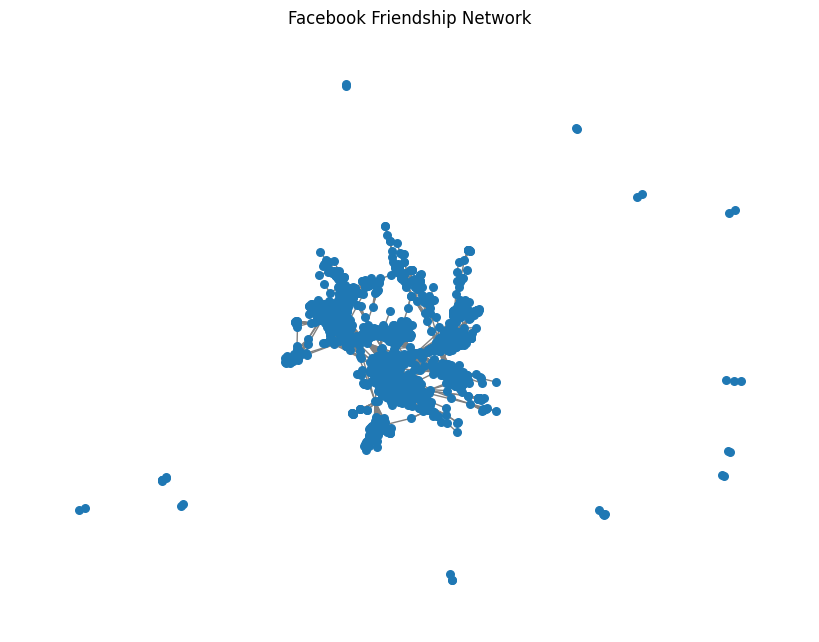

In [6]:

import networkx as nx
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load Facebook dataset
G = nx.read_edgelist("facebook_combined.txt", nodetype=int)
print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())

# Function to generate dataset for ML
def generate_features(graph):
    data = []
    labels = []
    nodes = list(graph.nodes())

    for _ in range(5000):
        u, v = np.random.choice(nodes, 2, replace=False)
        label = 1 if graph.has_edge(u, v) else 0

        # Topological features
        common_neighbors = len(list(nx.common_neighbors(graph, u, v)))
        jaccard_coeff = list(nx.jaccard_coefficient(graph, [(u, v)]))[0][2]
        preferential_attachment = list(nx.preferential_attachment(graph, [(u, v)]))[0][2]

        # Non-topological (random example feature)
        deg_u = graph.degree(u)
        deg_v = graph.degree(v)

        features = [common_neighbors, jaccard_coeff, preferential_attachment, deg_u, deg_v]
        data.append(features)
        labels.append(label)

    return np.array(data), np.array(labels)

# Prepare dataset
X, y = generate_features(G)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ML Models
svm = SVC(probability=True)
knn = KNeighborsClassifier(n_neighbors=5)
nn = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500)

# Train models
svm.fit(X_train, y_train)
knn.fit(X_train, y_train)
nn.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nn = nn.predict(X_test)

# AUC
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_nn = roc_auc_score(y_test, nn.predict_proba(X_test)[:, 1])

# Results Dictionary
results = {
    'SVM Accuracy': accuracy_score(y_test, y_pred_svm),
    'SVM AUC': auc_svm,
    'k-NN Accuracy': accuracy_score(y_test, y_pred_knn),
    'k-NN AUC': auc_knn,
    'Neural Net Accuracy': accuracy_score(y_test, y_pred_nn),
    'Neural Net AUC': auc_nn
}

print(results)

# Plot Network Graph using Matplotlib
plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_size=30, edge_color='gray')
plt.title("Facebook Friendship Network")
plt.show()